In [32]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from demo import Spotify, Recommender
from demo.lib import DB
from demo.displays import Demo1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1.Spotify Search Program

In [33]:
db = DB()

search_sp = Spotify()
search_sp.search()

mailbox_id = db.save_mailbox(search_sp.sel_tracks)

Demo1.pt1(mailbox_id)
search_sp.sel_tracks.head()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


### 우체통 <u>'62964109964d49985a8708d2'</u>이 등록되었습니다.

,trackId,trackName,artistIds,artistNames,image
0,1iyq8iQzqjRs7Aub5Dmn7N,Handhold,7c1HgFDe8ogy5NOZ1ANCJQ,"Car, the garden",https://i.scdn.co/image/ab67616d0000b273956e5a...
1,046Gh1kXtPynYPaKep5M8E,So life goes on,5z8B2oTjiZbpbMB6rAfPGl,Heo Hoy Kyung,https://i.scdn.co/image/ab67616d0000b273f53859...
2,3kNGEbIhTWU0L6RslcXPXr,Fully Empty,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b2735c55c8...
3,5EFxoz2Ub0FHU33GpE9Eke,Being Someone's Mind,7zdCvtTQdMCj37CuQxkyQf,Yebit,https://i.scdn.co/image/ab67616d0000b27389f911...


# 2. Recommender 객체 초기화

In [34]:
recommender = Recommender(mailbox_id)
recommender.init_setting()

In [35]:
Demo1.pt2_1(recommender)
recommender.user['tracks'].head()

### 우체통 <u>'62964109964d49985a8708d2'</u>에는 총 <u>4개의 음악</u>이 등록 되어 있습니다.

,trackId,trackName,artistIds,artistNames,image
0,1iyq8iQzqjRs7Aub5Dmn7N,Handhold,7c1HgFDe8ogy5NOZ1ANCJQ,"Car, the garden",https://i.scdn.co/image/ab67616d0000b273956e5a...
1,046Gh1kXtPynYPaKep5M8E,So life goes on,5z8B2oTjiZbpbMB6rAfPGl,Heo Hoy Kyung,https://i.scdn.co/image/ab67616d0000b273f53859...
2,3kNGEbIhTWU0L6RslcXPXr,Fully Empty,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b2735c55c8...
3,5EFxoz2Ub0FHU33GpE9Eke,Being Someone's Mind,7zdCvtTQdMCj37CuQxkyQf,Yebit,https://i.scdn.co/image/ab67616d0000b27389f911...


In [36]:
Demo1.pt2_2(recommender)
recommender.reco['tracks'].head()

### 우체통 <u>'62964109964d49985a8708d2'</u>의 음악들의 <u>Spoitfy 추천 음악은 총 319 개</u> 입니다.

,trackId,trackName,artistIds,artistNames,image,seedId
0,7d0XkI4iJ32nxeFAHFXbLQ,"If You Need To, Keep Time on Me",4EVpmkEwrLYEg6jIsiPMIb,Fleet Foxes,https://i.scdn.co/image/ab67616d0000b27371b24e...,1iyq8iQzqjRs7Aub5Dmn7N
1,0qvzXomUDJVaUboy2wMfiS,This Town,1Hsdzj7Dlq2I7tHP7501T4,Niall Horan,https://i.scdn.co/image/ab67616d0000b2735bac23...,1iyq8iQzqjRs7Aub5Dmn7N
2,7hJ8bvpxNmXQsDGcuAj7on,Where Love Begins (From 'Yoobyeolna! Chef Moon'),3VQDqjQ4wJyw8PzpGdlZpB,Colde,https://i.scdn.co/image/ab67616d0000b2734701c3...,1iyq8iQzqjRs7Aub5Dmn7N
3,6oVzBzM456FcwTeDHGUsn4,지친하루 (with 곽진언 & 김필),0hW1muryuCdZLfjoLrUhnw,Yoon Jong Shin,https://i.scdn.co/image/ab67616d0000b2738d0c16...,1iyq8iQzqjRs7Aub5Dmn7N
4,2xqZgDhbEzNIQGEz8HdrkJ,I got lucky,0kRAVpQhUUArA8UnYwEdeZ,Kwon Jin Ah,https://i.scdn.co/image/ab67616d0000b27345ba9f...,1iyq8iQzqjRs7Aub5Dmn7N


# 3. 데이터 병합 & 데이터 전처리

### Seed음악과 추천음악의 병합이 완료되었습니다. 총 <u>323개의 음악</u>들로 구성되어 있습니다.

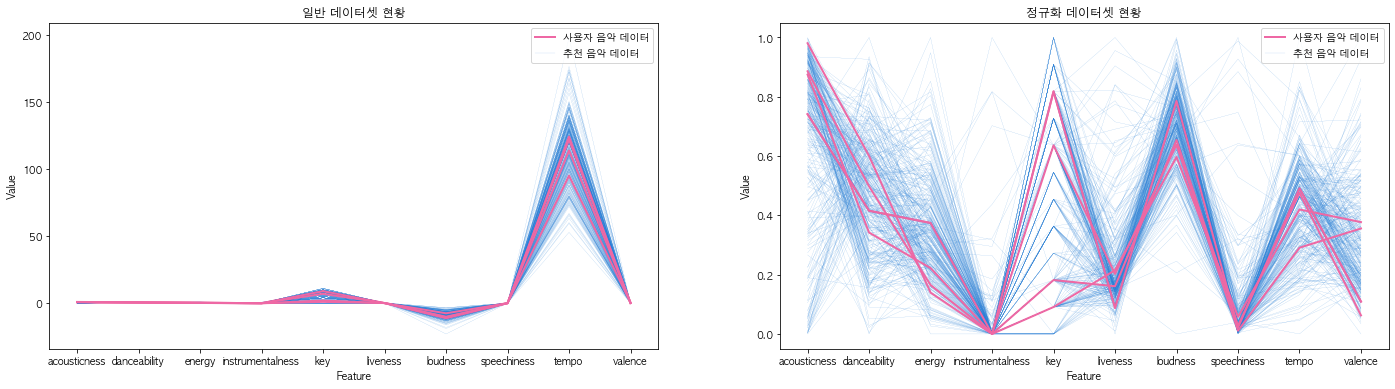

In [37]:
recommender.merge()
Demo1.pt3(recommender)
recommender.data_preprocessing()
recommender.draw_dataset()

# 4. KMeans Fitting

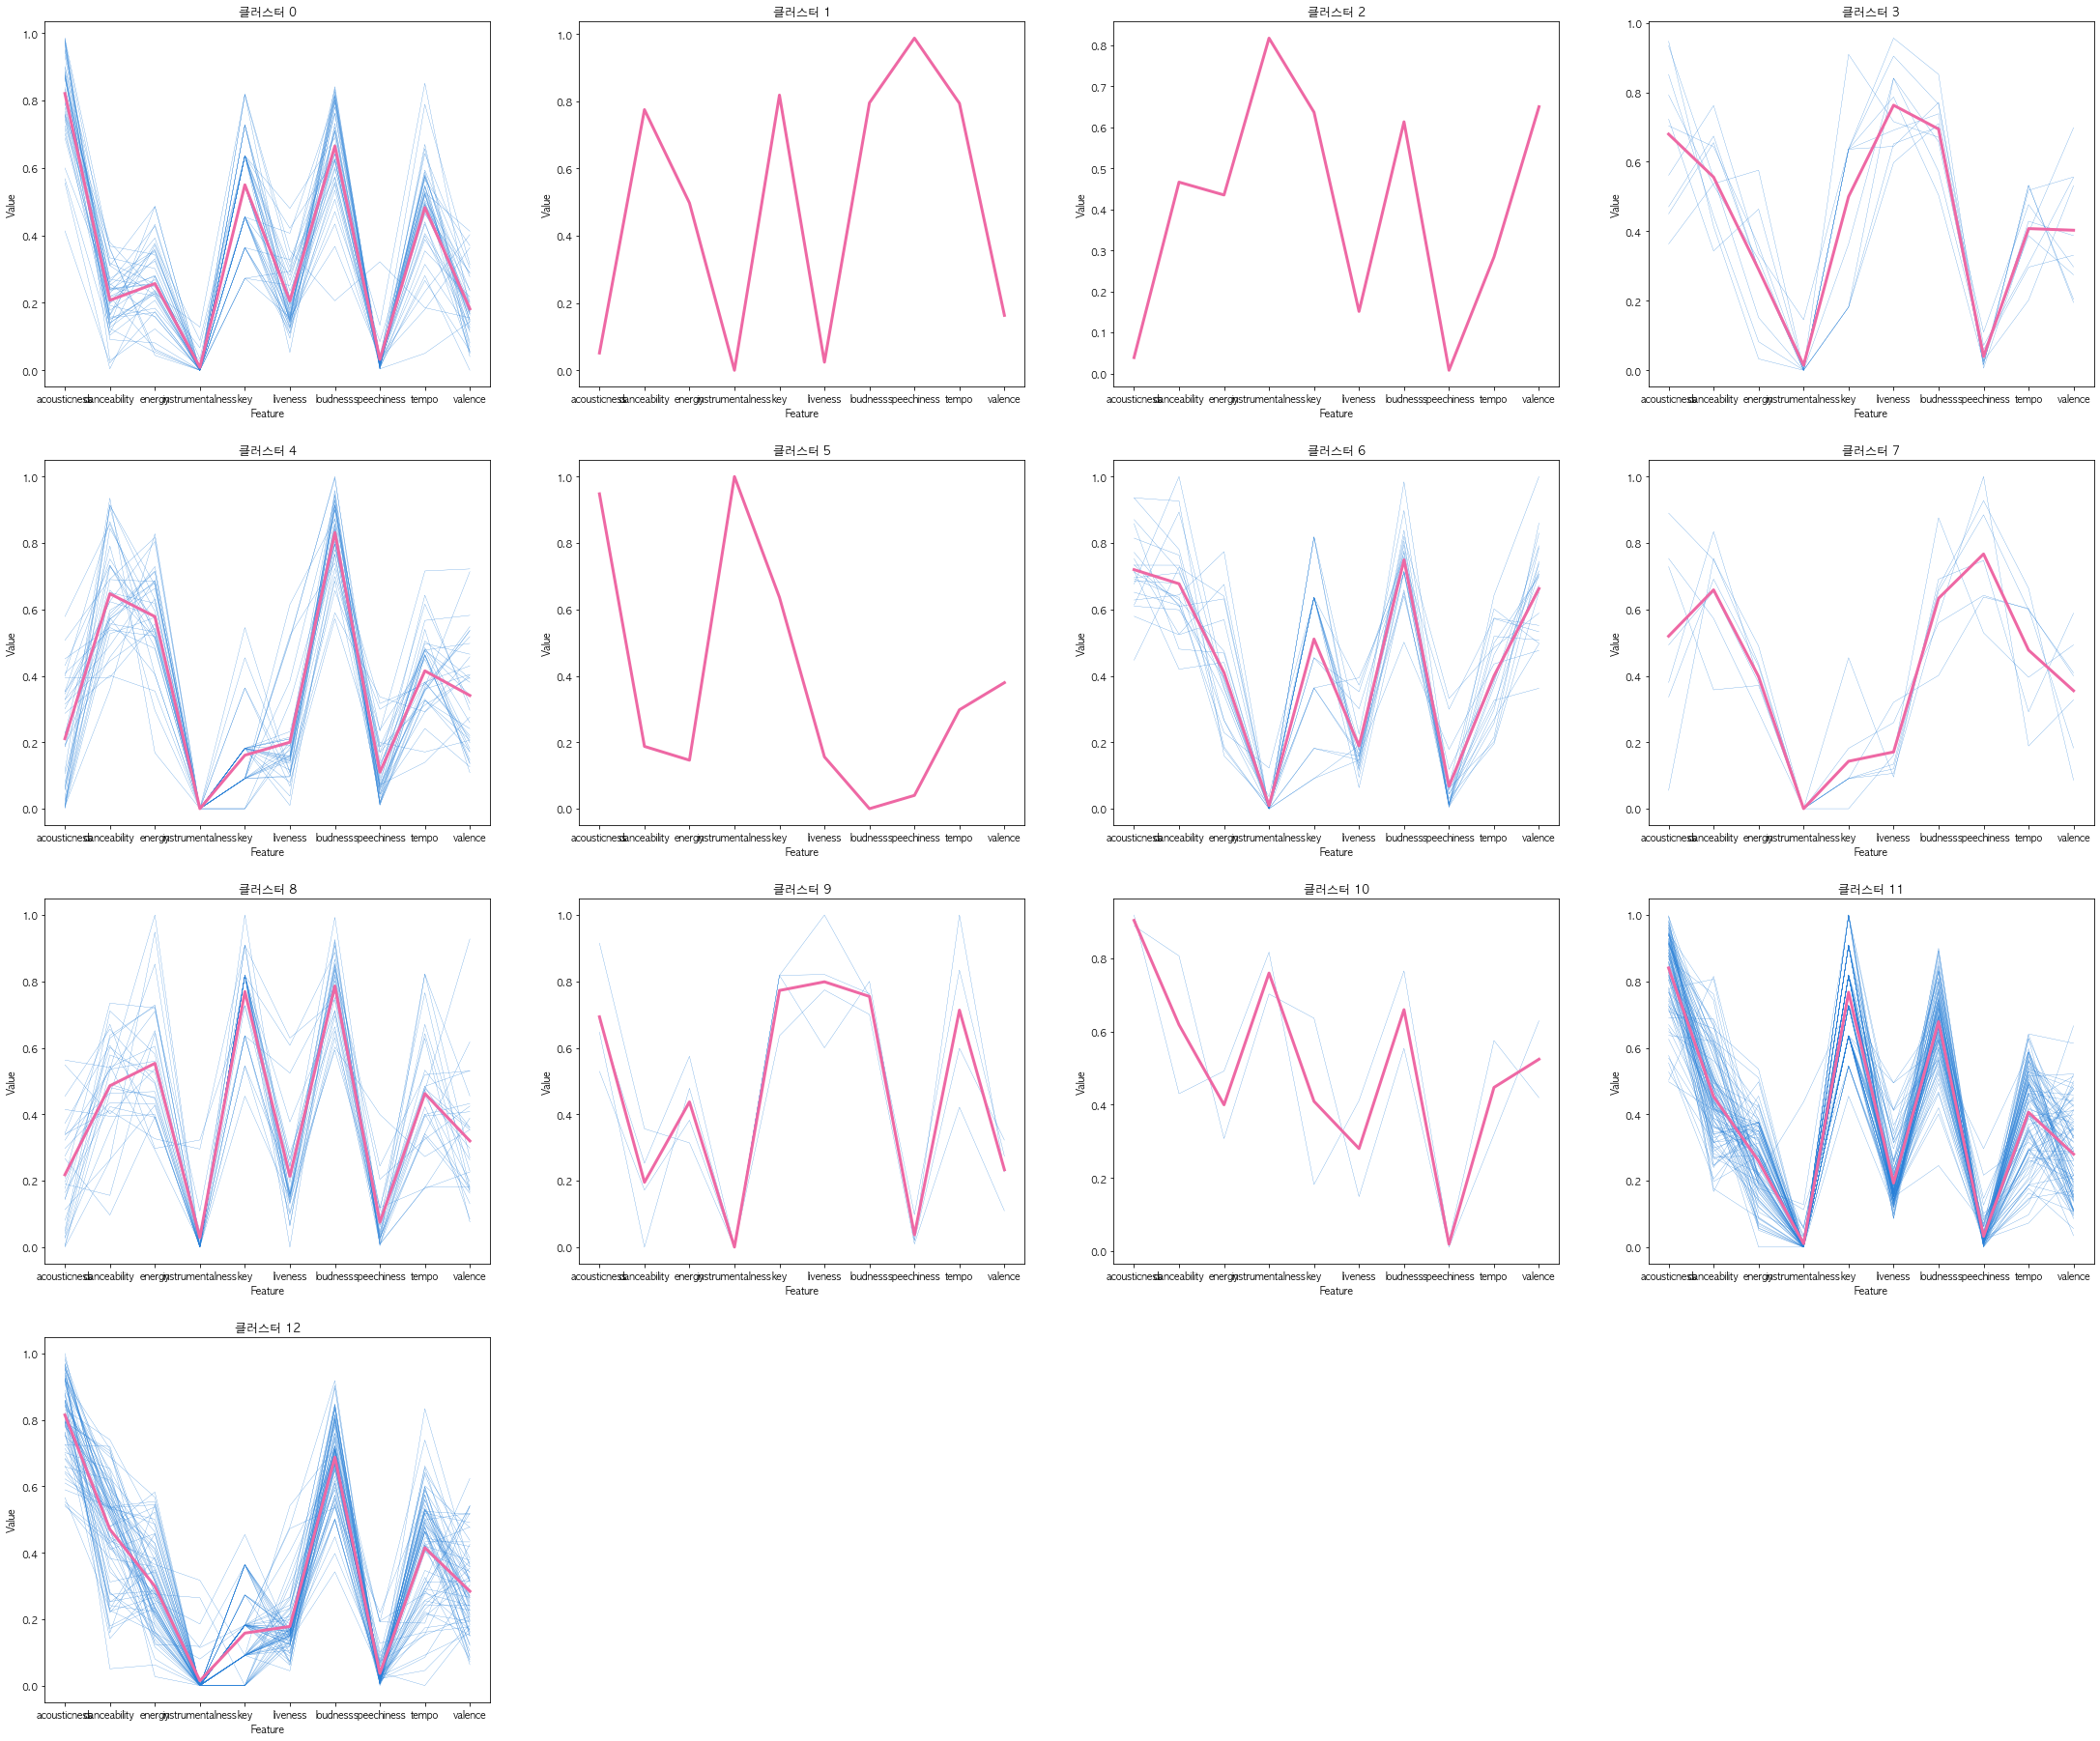

In [38]:
recommender.run()
Demo1._clear()
recommender.draw_cluster()

# 5. 추천 클러스터 파싱

### 우체통 <u>'62964109964d49985a8708d2'</u>의 음악들은 <u>클러스터[11 12]번</u>에 속해 있습니다.

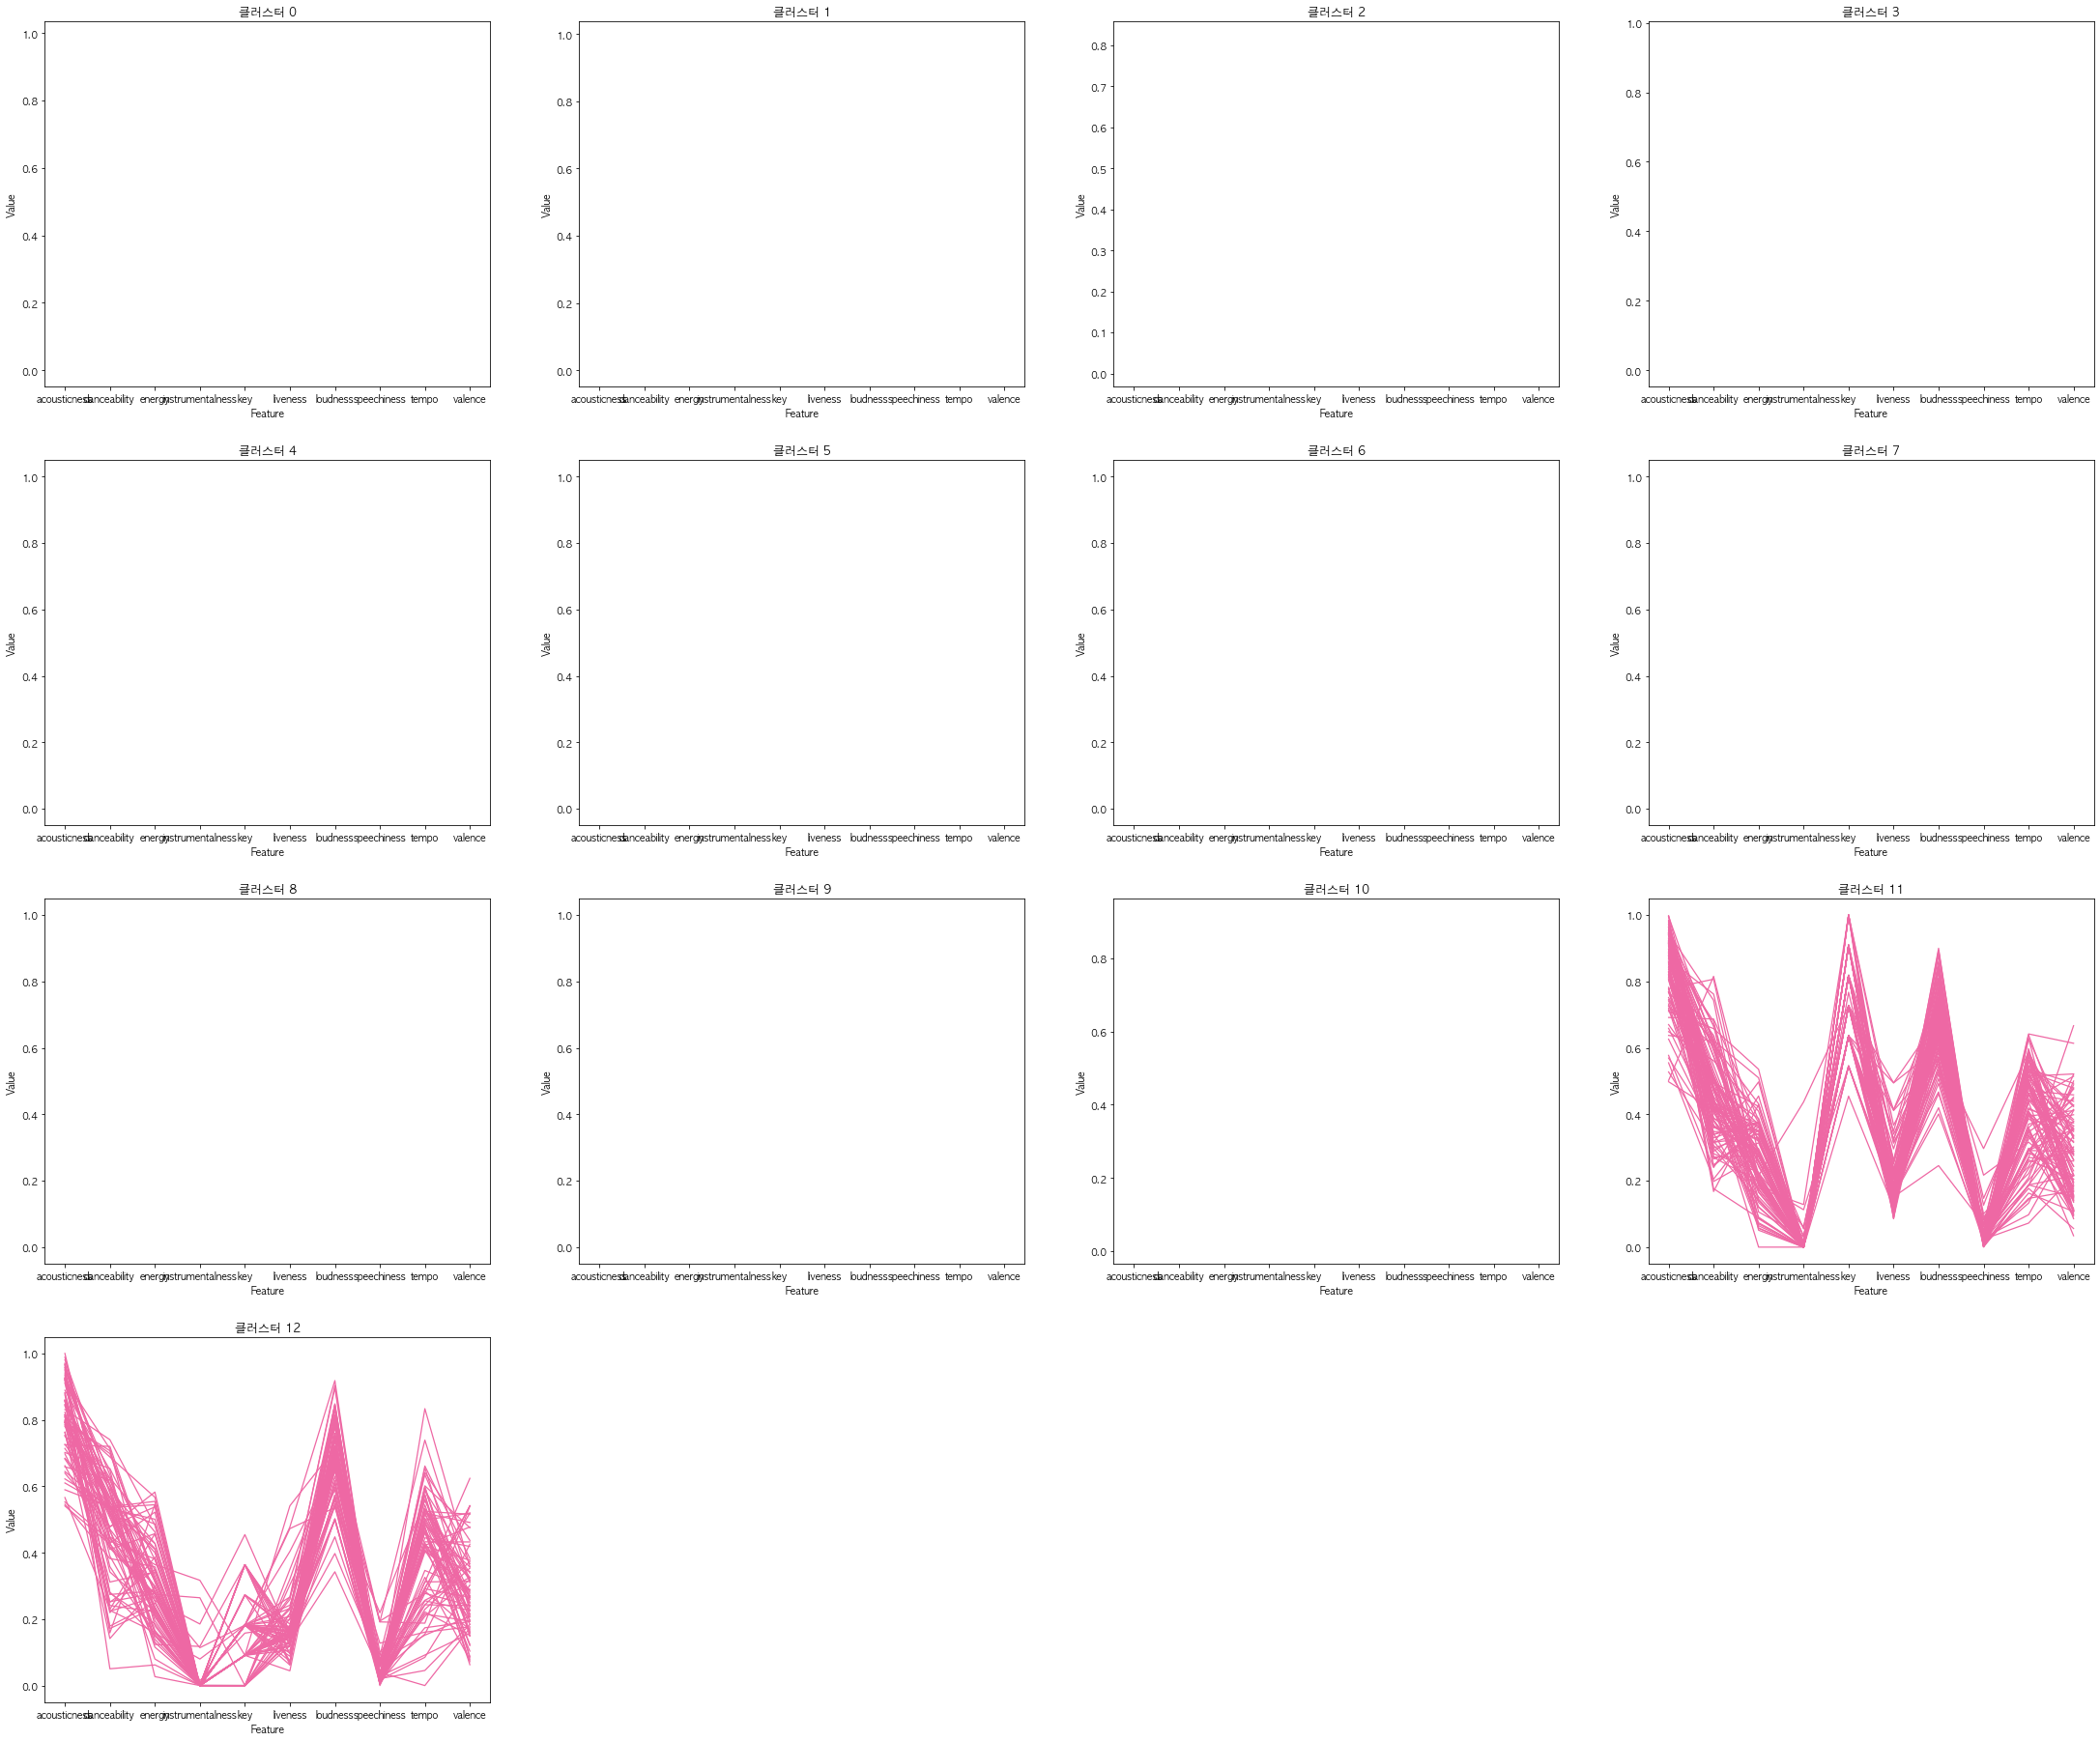

In [39]:
recommender.parse_reco_cluster()
Demo1.pt6_1(recommender)
recommender.draw_cluster()

In [40]:
Demo1.pt6_2(recommender)
recommender.reco_['tracks'].head()

### 우체통 <u>'62964109964d49985a8708d2'</u>를 위한 총 <u>167개의 추천음악</u>이 선정 되었습니다.

,trackId,trackName,artistIds,artistNames,image,seedId
0,7d0XkI4iJ32nxeFAHFXbLQ,"If You Need To, Keep Time on Me",4EVpmkEwrLYEg6jIsiPMIb,Fleet Foxes,https://i.scdn.co/image/ab67616d0000b27371b24e...,1iyq8iQzqjRs7Aub5Dmn7N
1,0qvzXomUDJVaUboy2wMfiS,This Town,1Hsdzj7Dlq2I7tHP7501T4,Niall Horan,https://i.scdn.co/image/ab67616d0000b2735bac23...,1iyq8iQzqjRs7Aub5Dmn7N
2,7hJ8bvpxNmXQsDGcuAj7on,Where Love Begins (From 'Yoobyeolna! Chef Moon'),3VQDqjQ4wJyw8PzpGdlZpB,Colde,https://i.scdn.co/image/ab67616d0000b2734701c3...,1iyq8iQzqjRs7Aub5Dmn7N
3,6oVzBzM456FcwTeDHGUsn4,지친하루 (with 곽진언 & 김필),0hW1muryuCdZLfjoLrUhnw,Yoon Jong Shin,https://i.scdn.co/image/ab67616d0000b2738d0c16...,1iyq8iQzqjRs7Aub5Dmn7N
4,2xqZgDhbEzNIQGEz8HdrkJ,I got lucky,0kRAVpQhUUArA8UnYwEdeZ,Kwon Jin Ah,https://i.scdn.co/image/ab67616d0000b27345ba9f...,1iyq8iQzqjRs7Aub5Dmn7N


# 6. 수량 조정 작업

### 현재 Seed음악들의 추천음악 수량 표준편차는 <u>10</u> 입니다.

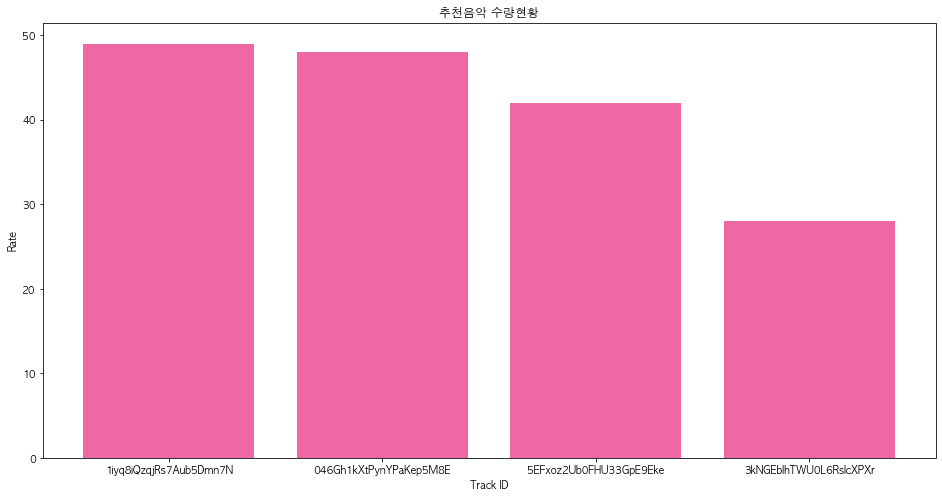

In [41]:
Demo1.pt7(recommender)
recommender.draw_rate()

### 현재 Seed음악들의 추천음악 수량 표준편차는 <u>0</u> 입니다.

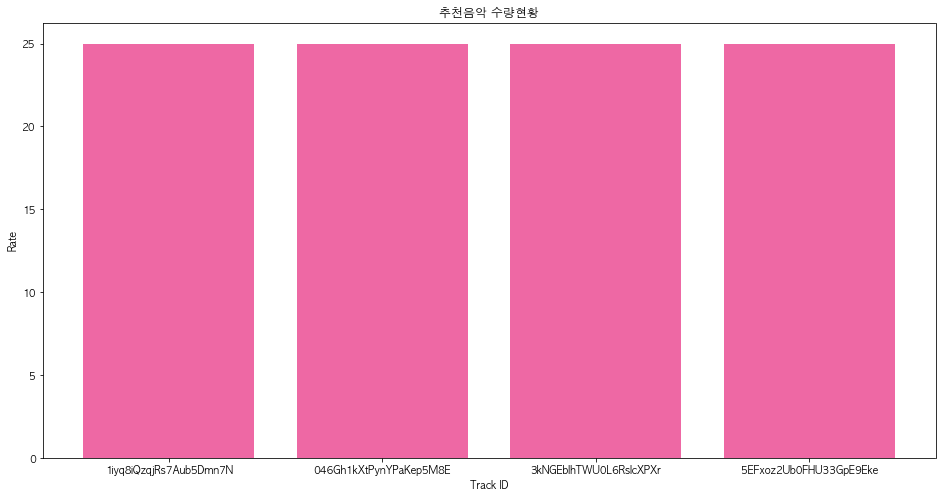

In [42]:
recommender.adjust_rate()
Demo1.pt7(recommender)
recommender.draw_rate()

# Letter
## 최종 추천 음악플레이리스트

### 우체통 <u>'62964109964d49985a8708d2'</u>를 위한 총 <u>100개의 추천음악</u>이 선정 되었습니다.

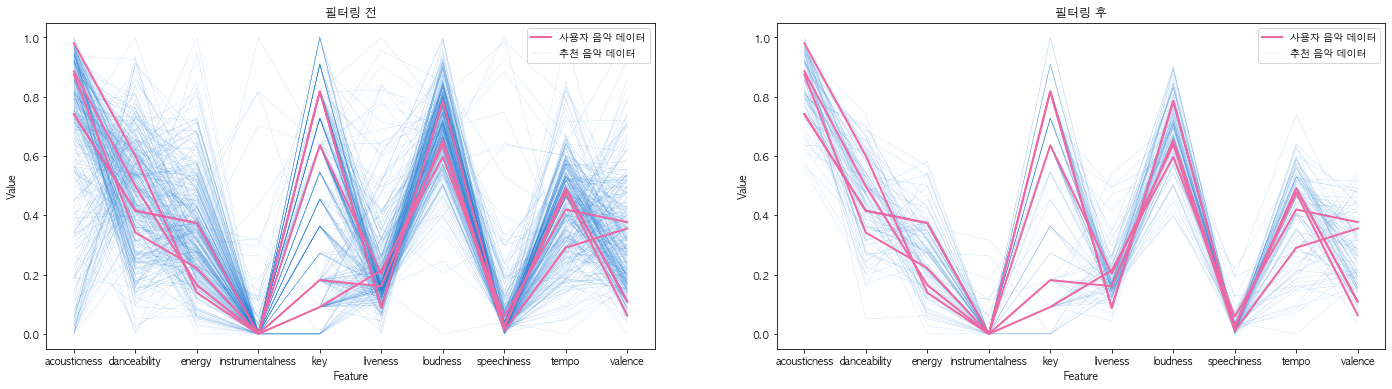

,trackId,trackName,artistIds,artistNames,image,seedId
0,7d0XkI4iJ32nxeFAHFXbLQ,"If You Need To, Keep Time on Me",4EVpmkEwrLYEg6jIsiPMIb,Fleet Foxes,https://i.scdn.co/image/ab67616d0000b27371b24e...,1iyq8iQzqjRs7Aub5Dmn7N
1,0qvzXomUDJVaUboy2wMfiS,This Town,1Hsdzj7Dlq2I7tHP7501T4,Niall Horan,https://i.scdn.co/image/ab67616d0000b2735bac23...,1iyq8iQzqjRs7Aub5Dmn7N
2,7hJ8bvpxNmXQsDGcuAj7on,Where Love Begins (From 'Yoobyeolna! Chef Moon'),3VQDqjQ4wJyw8PzpGdlZpB,Colde,https://i.scdn.co/image/ab67616d0000b2734701c3...,1iyq8iQzqjRs7Aub5Dmn7N
3,6oVzBzM456FcwTeDHGUsn4,지친하루 (with 곽진언 & 김필),0hW1muryuCdZLfjoLrUhnw,Yoon Jong Shin,https://i.scdn.co/image/ab67616d0000b2738d0c16...,1iyq8iQzqjRs7Aub5Dmn7N
4,2xqZgDhbEzNIQGEz8HdrkJ,I got lucky,0kRAVpQhUUArA8UnYwEdeZ,Kwon Jin Ah,https://i.scdn.co/image/ab67616d0000b27345ba9f...,1iyq8iQzqjRs7Aub5Dmn7N


In [43]:
Demo1.pt6_2(recommender)

recommender.draw_filtering()
recommender.reco_['tracks'].head()

In [44]:
mail_id = db.save_mail(recommender)
Demo1.pt8(recommender, mail_id)

### 우체통 <u>62964109964d49985a8708d2</u>를 위한 음악편지 <u>62964174964d49985a8708d4</u>를 넣어놨어요.